In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('SeoulBikeData.csv', encoding='cp949')
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


##### Data Understanding:

In [5]:
df.shape

(8760, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(캜),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(캜),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#### Checking Null Values:

In [9]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

Checking Duplicates:

In [15]:
df.duplicated().sum()

0

#### EDA:

In [20]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


- What are the value counts of Rented Bikes?

In [39]:
df['Rented Bike Count'].value_counts().sort_values(ascending=False)

Rented Bike Count
0       295
223      19
262      19
122      19
165      18
       ... 
2443      1
3146      1
1699      1
2003      1
595       1
Name: count, Length: 2166, dtype: int64

- What are the average number of bikes rented everyday?

In [106]:
# round(df['Rented Bike Count'].mean()) this is wrong bcs it is hourly data so groupby date and then find mean
round(df.groupby(['Date'])['Rented Bike Count'].mean().sort_values(ascending=False))

Date
13/06/2018    1506.0
19/06/2018    1473.0
08/06/2018    1463.0
20/06/2018    1443.0
21/06/2018    1443.0
               ...  
28/09/2018       0.0
06/11/2018       0.0
09/10/2018       0.0
09/11/2018       0.0
11/04/2018       0.0
Name: Rented Bike Count, Length: 365, dtype: float64

- What are the maximum and minimum number of bikes rented in a day?

In [99]:
print(f"Maximum Bikes Rented: {df.groupby(['Date'])['Rented Bike Count'].sum().max()}")
print(f"Minimum Bikes Rented: {df.groupby(['Date'])['Rented Bike Count'].sum().min()}")

Maximum Bikes Rented: 36149
Minimum Bikes Rented: 0


- At which day maximum number of bikes rented?

In [113]:
print("Maximum number of bikes rented in a day:", df.groupby(['Date'])['Rented Bike Count'].sum().max())
print("Date with maximum bikes rented:", df.groupby(['Date'])['Rented Bike Count'].sum().idxmax())

Maximum number of bikes rented in a day: 36149
Date with maximum bikes rented: 13/06/2018


In [112]:
df[df['Date'] == df.groupby(['Date'])['Rented Bike Count'].sum().idxmax()]

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4656,13/06/2018,1274,0,19.3,76,1.2,1968,14.9,0.00,0.0,0.0,Summer,No Holiday,Yes
4657,13/06/2018,1088,1,18.9,77,0.7,1987,14.7,0.00,0.0,0.0,Summer,No Holiday,Yes
4658,13/06/2018,847,2,18.4,75,0.6,1986,13.8,0.00,0.0,0.0,Summer,No Holiday,Yes
4659,13/06/2018,591,3,18.5,73,1.0,1951,13.5,0.00,0.0,0.0,Summer,No Holiday,Yes
4660,13/06/2018,421,4,18.7,74,0.9,1933,13.9,0.00,0.0,0.0,Summer,No Holiday,Yes
4661,13/06/2018,290,5,18.6,76,0.4,1957,14.2,0.00,0.0,0.0,Summer,No Holiday,Yes
4662,13/06/2018,416,6,18.7,75,0.9,1923,14.1,0.06,0.0,0.0,Summer,No Holiday,Yes
4663,13/06/2018,657,7,19.4,69,0.3,1277,13.5,0.42,0.0,0.0,Summer,No Holiday,Yes
4664,13/06/2018,959,8,20.7,65,1.5,1004,13.8,0.97,0.0,0.0,Summer,No Holiday,Yes
4665,13/06/2018,1111,9,22.6,59,1.6,1030,14.1,1.80,0.0,0.0,Summer,No Holiday,Yes


- Which Season Bikes are rented the most?

In [45]:
season = df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False)
season

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64

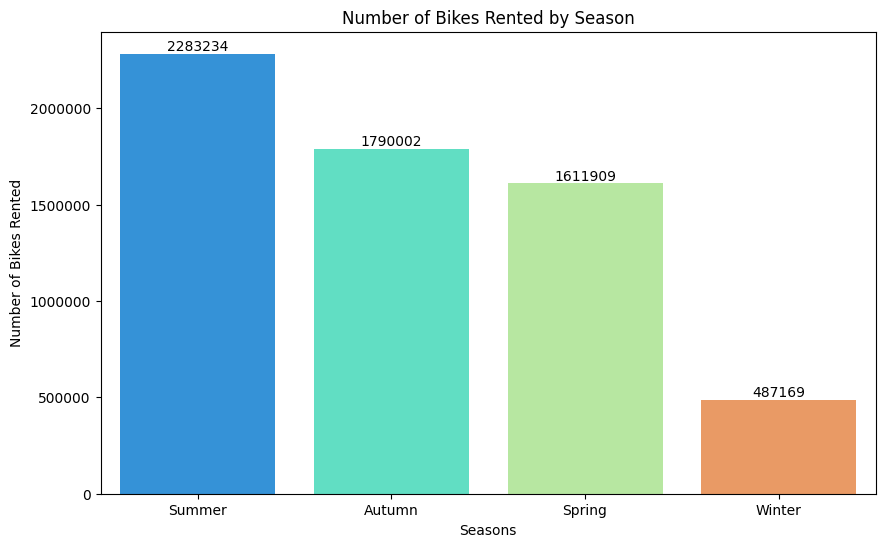

In [88]:
index = season.index
values = season.values
plt.figure(figsize=(10,6))
ax = sns.barplot(x = index, y = values, palette='rainbow')
plt.title('Number of Bikes Rented by Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Bikes Rented')
ax.get_yaxis().get_major_formatter().set_scientific(False)
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f' ,label_type='edge')
plt.show()

- Does Rainfall affect the Rented Bikes number?

In [115]:
rainfall = df.groupby(['Rainfall(mm)'])['Rented Bike Count'].sum().sort_values(ascending=False)
rainfall

Rainfall(mm)
0.0     6086009
0.5       28604
0.1       15179
1.0        8419
1.5        5686
         ...   
12.5         17
12.0         13
16.0         11
15.5         10
7.5           9
Name: Rented Bike Count, Length: 61, dtype: int64

- Yes it does affect the number of bikes Rented. As the majority of bikes are rented when there is no rain or very little rainfall.

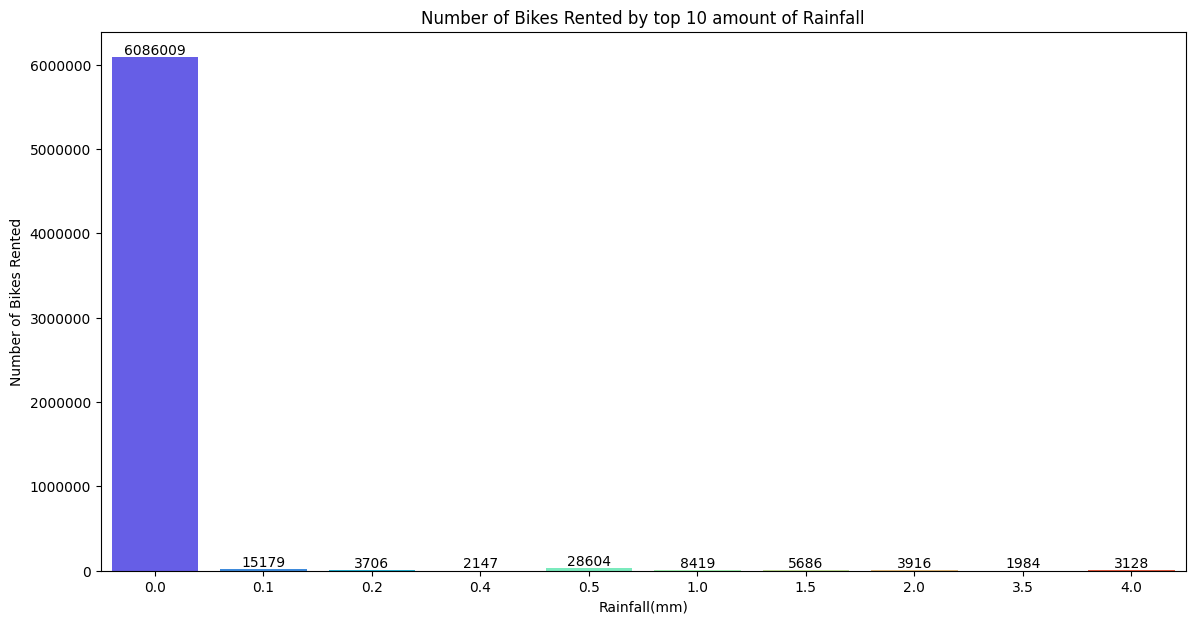

In [93]:
index = rainfall.index[:10]
values = rainfall.values[:10]
plt.figure(figsize=(14,7))
ax = sns.barplot(y = values, x = index, palette='rainbow')
plt.title('Number of Bikes Rented by top 10 amount of Rainfall')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Number of Bikes Rented')
ax.get_yaxis().get_major_formatter().set_scientific(False)
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f' ,label_type='edge')
plt.show()

- Does Snowfall affect the number of bikes rented?

In [77]:
snowfall = df.groupby('Snowfall (cm)')['Rented Bike Count'].sum().sort_values(ascending=False)
snowfall

Snowfall (cm)
0.0    6090314
0.3       8304
1.0       6357
0.4       5981
0.8       5632
0.7       5108
0.9       4854
0.5       4716
2.0       4191
2.2       3813
1.6       3771
0.2       3643
0.6       2775
2.5       1980
3.5       1856
1.8       1551
2.6       1303
3.0       1169
1.1       1098
1.3       1092
3.2       1027
2.7       1009
2.3        897
3.3        841
2.4        792
3.7        789
1.7        754
1.9        703
2.9        655
2.1        546
4.1        459
3.6        436
1.2        435
1.4        429
5.0        374
3.4        367
2.8        355
3.8        276
6.0        241
0.1        205
8.8        176
1.5        168
7.0        167
4.0        160
3.1        119
4.2        116
3.9         94
4.8         80
5.1         62
4.3         50
7.1         24
Name: Rented Bike Count, dtype: int64

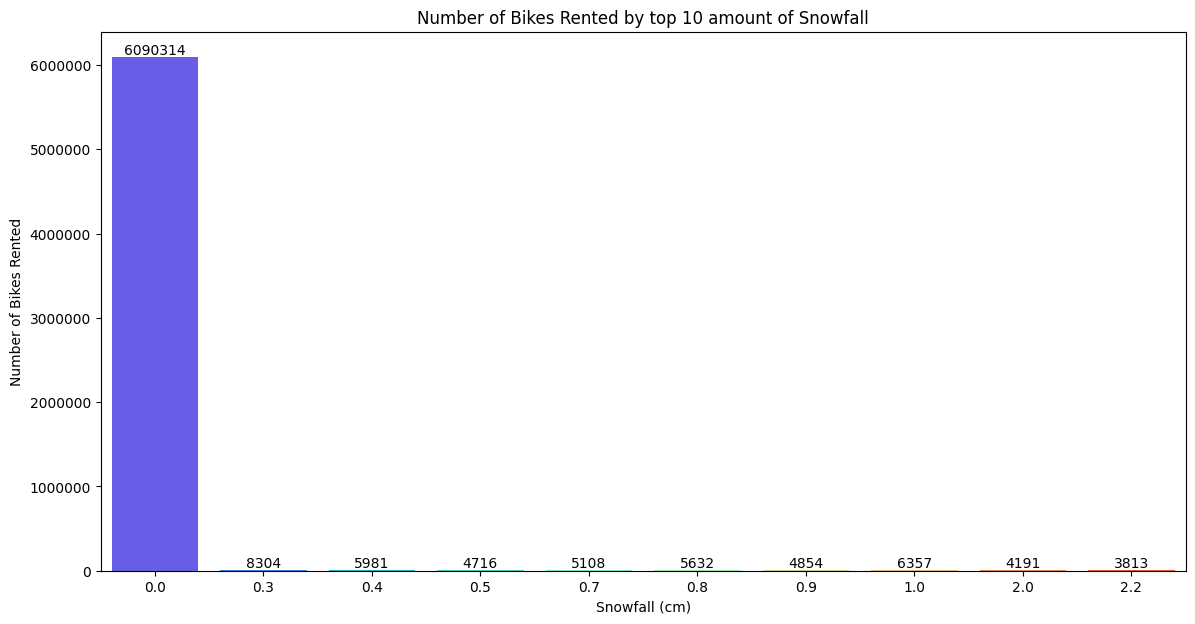

In [90]:
index = snowfall.index[:10]
values = snowfall.values[:10]
plt.figure(figsize=(14,7))
ax = sns.barplot(y = values, x = index, palette='rainbow')
plt.title('Number of Bikes Rented by top 10 amount of Snowfall')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Number of Bikes Rented')
ax.get_yaxis().get_major_formatter().set_scientific(False)
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f' ,label_type='edge')
plt.show()

- - Yes Snowfall does affect the number of bikes Rented. As the majority of bikes are rented when there is no snowfall or very little snowfall.

- What about Holidays? Does people rent more bikes during holiday or not?

In [71]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [73]:
holiday = df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending=False)
holiday

Holiday
No Holiday    5956419
Holiday        215895
Name: Rented Bike Count, dtype: int64

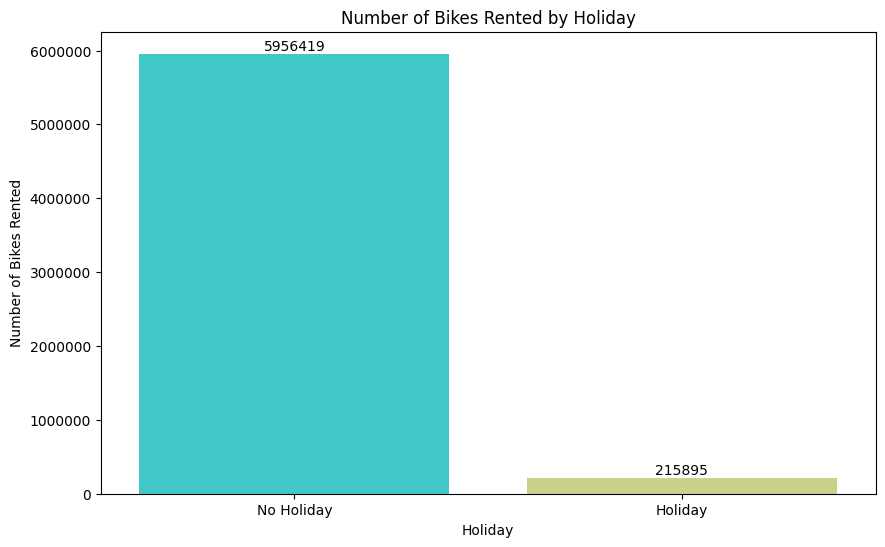

In [91]:
index = holiday.index
values = holiday.values
plt.figure(figsize=(10,6))
ax = sns.barplot(x = index, y = values, palette='rainbow')
plt.title('Number of Bikes Rented by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Number of Bikes Rented')
ax.get_yaxis().get_major_formatter().set_scientific(False)
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f' ,label_type='edge')
plt.show()

- Yes majority of bikes are rented during no holiday. As many people use it as transport.

In [94]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


- Does Functioning Day type affect the number of bikes rented?

In [116]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [118]:
functioning_day = df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending=False)
functioning_day

Functioning Day
Yes    6172314
No           0
Name: Rented Bike Count, dtype: int64

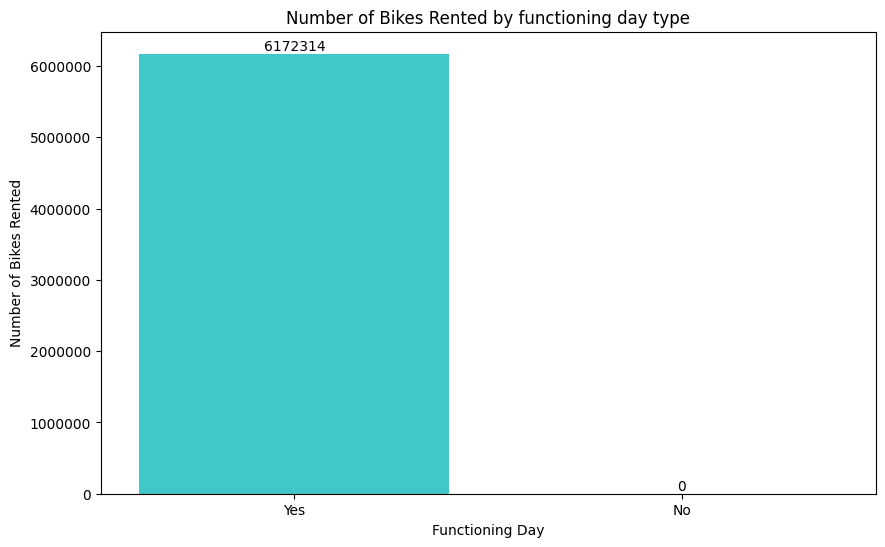

In [119]:
index = functioning_day.index
values = functioning_day.values
plt.figure(figsize=(10,6))
ax = sns.barplot(x = index, y = values, palette='rainbow')
plt.title('Number of Bikes Rented by functioning day type')
plt.xlabel('Functioning Day')
plt.ylabel('Number of Bikes Rented')
ax.get_yaxis().get_major_formatter().set_scientific(False)
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f' ,label_type='edge')
plt.show()